## IMPORT DES LIBRAIRIES

In [3]:
# Package de manipaulation des tableaux et dataframe
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Package pour analyse statistique
import scipy.stats as ss

# Package pour représentation graphique
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scikitplot as skplt

# Affichage Image (png, jpeg, html ...)
from IPython.display import Image, HTML

# Typing des fonctions
from typing import List, Optional

In [1]:
Test

NameError: name 'Test' is not defined

Décision 1 : importer les fichiers 1 par 1 dans une DF car la mise en forme est différente pour chacun des fichiers

## DECLARATION DES FONCTIONS

In [25]:
# ---------------------------------------Fonction-------------------
# Création d'une dataframe de distribution 
def ditrib_calc(var1,var2,var3):
    df_temp = pd.DataFrame(var1.value_counts(normalize=True) * 100).reset_index().rename(columns={"index": var2, var3: "count"})
    return df_temp

# Représentation graphique : bar plot target

def ditrib_graph(var1,var2,var3):
    fig = px.bar(var1, 
                 y="target", x="count",
                 hover_data={'count':':.2f'}
    )
    fig.update_layout(
        title=var2,
        xaxis_title="Pourcentage par classe",
        yaxis_title=var3,
        margin=dict(l=0, r=0, t=30, b=50),
        width=500, height=300
    )
    return fig.show()

## IMPORT et MISE EN FORME DES DONNEES

In [45]:
#---------------------------------------IMPORT DES DONNEES----------------------------------------------------------
# On spécifie le chemin d'accès aux données
folder_path = "./data/"

# On importe le fichier principal
df_pres_result = pd.read_csv(folder_path + "2020_US_County_Level_Presidential_Results.csv", sep = ",")
df_pres_result_old = pd.read_csv(folder_path + "US_County_Level_Presidential_Results_08-16.csv", sep = ",")
df_education = pd.read_excel(folder_path + "Education.xls")
df_pop_est = pd.read_excel(folder_path + "PopulationEstimates.xls")
df_pov_est = pd.read_excel(folder_path + "PovertyEstimates.xls")
df_unemp = pd.read_excel(folder_path + "Unemployment.xls")

#-----------------------------------------TYPOLOGIE DES FEATURES--------------------------------------------------------
# création d'une liste des dataframe à traiter
df_xls_list = [df_pres_result,df_education,df_pop_est,df_pov_est,df_unemp]

for d in df_xls_list:
    print(d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3152 entries, 0 to 3151
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state_name      3152 non-null   object 
 1   county_fips     3152 non-null   int64  
 2   county_name     3152 non-null   object 
 3   votes_gop       3152 non-null   int64  
 4   votes_dem       3152 non-null   int64  
 5   total_votes     3152 non-null   int64  
 6   diff            3152 non-null   int64  
 7   per_gop         3152 non-null   float64
 8   per_dem         3152 non-null   float64
 9   per_point_diff  3152 non-null   float64
dtypes: float64(3), int64(5), object(2)
memory usage: 246.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 47 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                        

In [47]:
df_education_1 = df_education.iloc[3:]
display(df_education_1) 

,"Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2019",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
3,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...,"Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19",Percent of adults with less than a high school...,Percent of adults with a high school diploma o...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...
4,00000,US,United States,NaN,NaN,NaN,NaN,52373312,34158051,11650730,...,27.4,24.4,26472261,59472748,63756905,70920162,11.998918,26.956844,28.898697,32.145542
5,01000,AL,Alabama,NaN,NaN,NaN,NaN,1062306,468269,136287,...,25.9,19,458922,1022839,993344,845772,13.819302,30.800268,29.912098,25.468332
6,01001,AL,Autauga County,2,2,2,2,6611,3757,933,...,26.9,18,4291,12551,10596,9929,11.483395,33.588459,28.356571,26.571573
7,01003,AL,Baldwin County,4,5,3,2,18726,8426,2334,...,29.3,23.1,13893,41797,47274,48148,9.193843,27.659616,31.284081,31.862459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,72145,PR,Vega Baja Municipio,1,1,1,1,NaN,NaN,NaN,...,21.4,14.4,10494,9681,8905,7834,28.428238,26.225822,24.123638,21.2223
3283,72147,PR,Vieques Municipio,7,12,7,12,NaN,NaN,NaN,...,13.7,10.1,1792,2440,875,1121,28.773281,39.177906,14.049454,17.999357
3284,72149,PR,Villalba Municipio,2,2,2,2,NaN,NaN,NaN,...,18,12.8,3330,5809,2987,3015,21.993263,38.366028,19.727892,19.912819
3285,72151,PR,Yabucoa Municipio,1,1,1,1,NaN,NaN,NaN,...,18.3,12.1,6927,6132,6494,4293,29.048897,25.715004,27.233078,18.003019


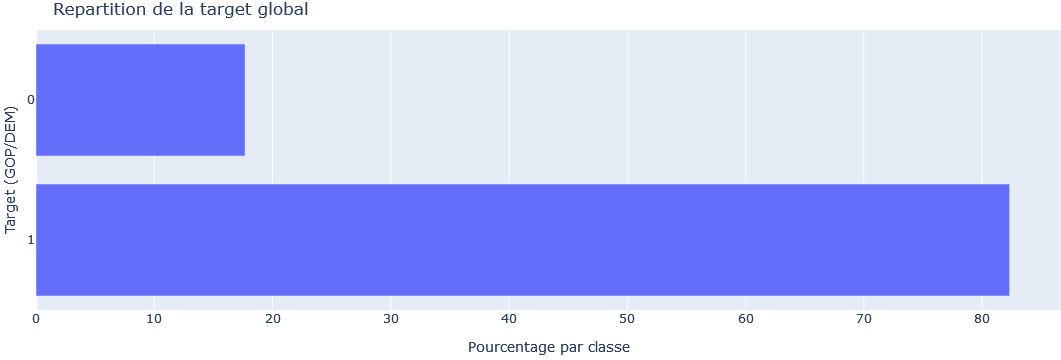

In [39]:
#----------------------------------------------CREATION DE LA TARGET 'Party' ---------------------------------------------------
conditionlist = [
    (df_pres_result['per_gop'] < df_pres_result['per_dem']) ,
    (df_pres_result['per_gop'] > df_pres_result['per_dem'])]
choicelist = [0,1]
df_pres_result['party'] = np.select(conditionlist, choicelist, default='Not Specified')

#print(df_pres_result['party']) #Affichage de la colonne party

# -------------------------------Representation globale de la target party-------------------

target_distribution_bef_split = ditrib_calc(df_pres_result['party'],"target","party")
#print(target_distribution_bef_split)
ditrib_graph(target_distribution_bef_split,"Repartition de la target global","Target (GOP/DEM)")

In [ ]:
#-------------------------------------------- REGROUPEMENT DES DONNES SOCIOECONOMIQUES -----------------------

#-------------------------------------------- MISE EN FORME DU JEU DE DONNEES -----------------------
# Séparer les variables explicatives de la target
X = df_pres_result.drop(["party"], axis=1)
y = df_pres_result["party"]

# split des données en train et test
set_seed = 1204
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=set_seed)

# Création des listes de variables par catégorie
cat_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()
num_cols =  X_train.select_dtypes(include=np.number).columns.tolist()
all_cols = X_train.columns.tolist()


# ------------------------------------DISTRIBUTION DE LA feature target 'party'-----------------------------------------------
target_distribution = ditrib_calc(y_train,"target","party")
#print(target_distribution)
ditrib_graph(target_distribution,"Repartition de la target sur le jeu y train","Target (GOP/DEM)")